<a href="https://colab.research.google.com/github/kim-minsol/MachineLearning2021-study/blob/main/machine_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

sklearn으로 머신러닝 시작하기

In [ ]:
# 필요한 라이브러리 로딩
# load_iris 를 import 시키기
from sklearn.datasets import load_iris
'''
# train_test_split 를 import 시키기
from ______ 
# KNeighborsClassifier 를 import 시키기
from ______
'''
# 데이터셋 로딩
iris = load_iris()

# 속성 이용하여 데이터셋의 전체적인 정보 확인
print(iris.DESCR)
'''
# 속성 이용하여 feature 확인(코드 제출시 주석 처리)
print('Iris data shape:', iris.data.shape)
print('Iris feature name\n:', iris.feature_names)
print('Iris data\n:', iris.data)
print('Iris data type\n:', type(iris.data))

# 속성 이용하여 class 확인 (코드 제출시 주석 처리)
print('iris target name:\n',iris.target_names)
print('iris target value:\n',iris.target)
'''
from sklearn.model_selection import train_test_split

# 데이터셋을 train, test 로 분할
# random_state 값은 강의와 동일하게 지정하세요.
x_train, x_test, y_train, y_test = train_test_split(iris.data,
                                                    iris.target,
                                                    test_size=0.3,
                                                    random_state=11)
'''
# 분할된 데이터의 shape 확인 (코드 제출시 주석 처리)
print('x_train.shape = ', x_train.shape)
print('y_train.shape = ', y_train.shape)
print('x_test.shape = ', x_test.shape)
print('y_test.shape = ', y_test.shape)
'''
from sklearn.neighbors import KNeighborsClassifier

# KNeighborsClassifier 의 객체 생성
knn = KNeighborsClassifier(n_neighbors=8)
#print(type(knn))

# 훈련 데이터를 이용하여 분류 모델 학습
knn.fit(x_train, y_train)

# 학습된 knn 모델 기반 예측
y_pred = knn.predict(x_test)
print('Prediction:\n',y_pred)

# 모델 평가
score = knn.score(x_test, y_test)
print('Accuracy : {0:.5f}'.format(score))

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

데이터 전처리 - 인코딩

In [ ]:
# 필요한 라이브러리 로딩
import seaborn as sns

# sklearn 의 LabelEncoder, OneHotEncoder 를 import 시키기
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

#데이터 로딩
tips = sns.load_dataset('tips')
#print(tips.head(5))

# 인코딩할 컬럼 데이터 준비 
items = tips['day']

# 1. 라벨인코딩(LabelEncoding) 실습
# LabelEncoder 객체 생성
encoder = LabelEncoder()

# fit 메소드에 인코딩할 데이터 전달
encoder.fit(items)

# transform 메소드를 통해 데이터 변 환 
labels = encoder.transform(items)


# 인코딩 결과 출력 (코드 제출시에는 주석 처리)
# print('Label Encoding Result:\n',labels)

# 인코딩된 수치형 데이터의 실제 클래스 확인 및 출력
classes = encoder.classes_
print('LabelEncoding classes:', classes)

# 디코딩 결과 확인 및 출력
inverse_result = encoder.inverse_transform([2])
print('LabelDecoding result:', inverse_result)


# 2. 원핫인코딩(OneHotEncoding) 실습
# 2차원 데이터로 변환
labels = labels.reshape(-1,1)

# OneHotEncoder 객체 생성
one_hot_encoder = OneHotEncoder()

# .fit 메소드에 인코딩할 데이터 전달
one_hot_encoder.fit(labels)

# .transform 메소드를 통해 데이터 변환 
one_hot_labels = one_hot_encoder.transform(labels)

# 인코딩 결과 출력 (코드 제출시에는 주석 처리)
#print('OneHotEncoding Result:\n', one_hot_labels.toarray())

# 속성 이용하여 인코딩된 데이터의 실제 클래스 확인
onehot_classes = one_hot_encoder.categories_
print('OneHotEncoding classes:', onehot_classes)


LabelEncoding classes: ['Fri' 'Sat' 'Sun' 'Thur']
LabelDecoding result: ['Sun']
OneHotEncoding classes: [array([0, 1, 2, 3])]


데이터전처리 - 스케일링 (1)

Average
temp         20.231
atemp        23.655
humidity     61.886
windspeed    12.799
dtype: float64
Variance
temp          60.709
atemp         71.819
humidity     370.371
windspeed     66.660
dtype: float64
--------- StandardScaler ---------
Average
temp         0.0
atemp       -0.0
humidity    -0.0
windspeed   -0.0
dtype: float64
Variance
temp         1.0
atemp        1.0
humidity     1.0
windspeed    1.0
dtype: float64


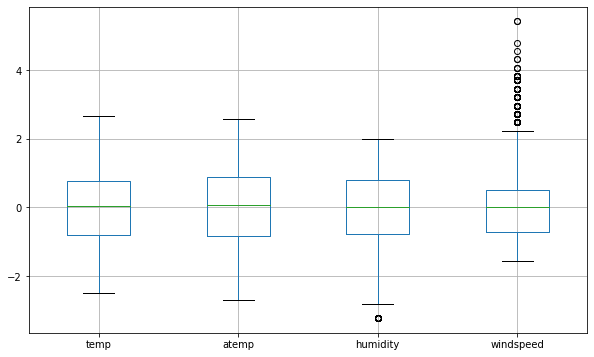

In [ ]:
# 필요한 라이브러리 로딩
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# StandardScaler 로딩
from sklearn.preprocessing import StandardScaler

# URL 통해서 캐글의 자전거 대여 수요 데이터셋 다운로드
url = 'https://codepresso-online-platform-public.s3.ap-northeast-2.amazonaws.com/learning-resourse/python-machine-learning-20210326/bike-demand.csv'
df_bike = pd.read_csv(url)
# 코드 제출시 아래 코드는 주석 처리 필요
#print(df_bike.head(5))

# temp, atemp, humidity, windspeed	컬럼 데이터만 저장
df_bike_num = df_bike.iloc[:, 5:9]
# 코드 제출시 아래 코드는 주석 처리 필요
#print(df_bike_num.head(5))

# 각 컬럼별 평균, 분산 출력
print('Average')
print(np.round_(df_bike_num.mean(),3))
print('Variance')
print(np.round_(df_bike_num.var(),3)) 

# StandardScaler 객체 생성
scaler = StandardScaler()

# StandardScaler 모델 통해 데이터 분포 분석
scaler.fit(df_bike_num)

# 모델 통해서 데이터 스케일링 후 반환
result = scaler.transform(df_bike_num)

# 스케일된 결과 데이터를 DataFrame 으로 저장
scaled_bike = pd.DataFrame(data=result, columns=df_bike_num.columns)

# 각 컬럼별 평균, 분산 출력
print('--------- StandardScaler ---------')
print('Average')
print(np.round_(scaled_bike.mean(),3))
print('Variance')
print(np.round_(scaled_bike.var(),3)) 

#박스풀롯으로 시각화
plt.figure(figsize=(10,6))
scaled_bike.boxplot(column=['temp', 'atemp', 'humidity', 'windspeed'])
plt.show()



데이터전처리 - 스케일링 (2)

In [ ]:
# 필요한 라이브러리 로딩
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# MinMaxScaler 로딩
from sklearn.preprocessing import MinMaxScaler

# URL 통해서 캐글의 자전거 대여 수요 데이터셋 다운로드
url = 'https://codepresso-online-platform-public.s3.ap-northeast-2.amazonaws.com/learning-resourse/python-machine-learning-20210326/bike-demand.csv'
df_bike = pd.read_csv(url)

# 확인용으로만 출력하시고, 최종 코드 제출시에는 주석 처리
#print(df_bike.head(5))

# temp, atemp, humidity, windspeed	컬럼 데이터만 저장
df_bike_num = df_bike.iloc[:, 5:9]

# 확인용으로만 출력하시고, 최종 코드 제출시에는 주석 처리
#print(df_bike_num.head(5))

# 각 컬럼별 최대/최소값 출력
print('Min Value')
print(np.round_(df_bike_num.min(),3))
print('Max Value')
print(np.round_(df_bike_num.max(),3)) 

# MinMaxScaler 객체 생성
scaler = MinMaxScaler()

# fit 함수 이용하여 데이터 분포 분석 및 스케일링 정보 저장
scaler.fit(df_bike_num)

# 실제 데이터 스케일링 작업 후 결과 데이터셋 반환
result = scaler.transform(df_bike_num)

# 스케일된 결과 데이터를 DataFrame 으로 저장
scaled_bike = pd.DataFrame(data=result, columns=df_bike_num.columns)

# 각 컬럼별 최대/최소값 출력
print('--------- MinMaxScaler ---------')
print('Min Value')
print(np.round_(scaled_bike.min(),3))
print('Max Value')
print(np.round_(scaled_bike.max(),3)) 


# 박스플롯(boxplot) 으로 시각화
plt.figure(figsize=(10,6))
scaled_bike.boxplot(column=['temp', 'atemp', 'humidity', 'windspeed'])
plt.show()

회귀의 이해

Data shape: (506, 13)
X shape: (506,)
y shape: (506,)


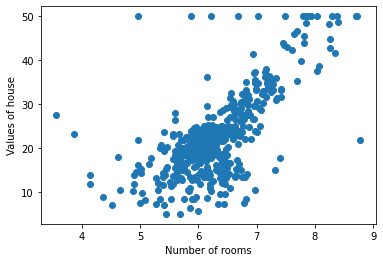

X reshape result: (506, 1)
y reshape result: (506, 1)
Testing data shape: (50, 1)


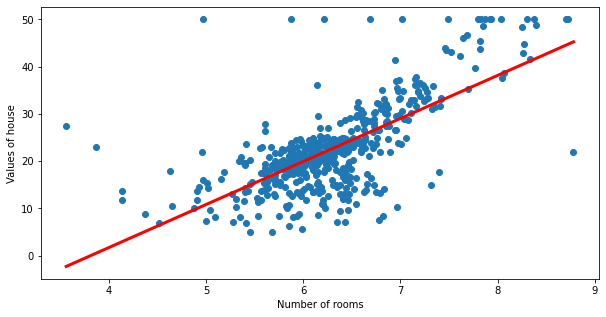

In [ ]:
# 필요한 라이브러리 로딩
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression

# Boston housing price 데이터셋 로딩
boston = load_boston()
print('Data shape:', boston.data.shape)

# 독립변수, 종속변수 데이터 정의
X_rooms = boston.data[ : , 5]
y = boston.target
print('X shape:', X_rooms.shape)
print('y shape:', y.shape)

# 데이터의 분포 확인을 위해 산점도로 시각화
plt.figure()
plt.scatter(X_rooms, y)
plt.xlabel('Number of rooms')
plt.ylabel('Values of house')
plt.show()

# 2차원 데이터로 shape 변환
X_rooms = X_rooms.reshape(-1,1)
y = y.reshape(-1,1)
print('X reshape result:', X_rooms.shape)
print('y reshape result:' , y.shape)

# LinearRegression 객체 생성
regression = LinearRegression()

# 학습데이터 연결 및 학습 수행
regression.fit(X_rooms, y)

# 테스팅에 사용할 데이터 생성
testing = np.linspace(min(X_rooms), max(X_rooms)).reshape(-1,1)
print('Testing data shape:', testing.shape)

# 모델 예측 수행
y_pred = regression.predict(testing)

# 최적의 회귀선 시각화
plt.figure(figsize=(10, 5))
# plt.scatter 이용해서 산점도 시각화
plt.scatter(X_rooms, y)
# plt.plot 이용해서 라인 그래프 시각화
plt.plot(testing, y_pred, color='red', Linewidth=3)
plt.xlabel('Number of rooms')
plt.ylabel('Values of house')
plt.show()

사이킷런을 이용한 회귀 실습

In [ ]:
# 필요한 라이브러리 로딩
import numpy as np
import pandas as pd

from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
# 모델 성능 평가를 위한 metrics 모듈 로딩
from sklearn import metrics

# 데이터셋 로딩
boston = load_boston()

# 데이터셋 분할
# random_state 값은 강의와 동일하게 지정하세요.
x_train, x_test, y_train, y_test = train_test_split(boston.data,
                                                    boston.target,
                                                    test_size=0.3,
                                                    random_state=12)
                             
# LinearRegression 객체 생성
regression = LinearRegression()

# 학습데이터 연결 및 학습 수행
regression.fit(x_train, y_train)

# 모델 예측
y_pred = regression.predict(x_test)

# 회귀 계수 출력
weight = np.round(regression.coef_, 1)
bias = np.round(regression.intercept_, 2)
print('Weight:', weight)
print('Bias:', bias)

# 컬럼별 회귀계수 출력
coef_table = pd.Series(data=weight,
                        index=boston.feature_names)

# 아래는 출력 결과만 확인하시고, 
# 최종 제출시에는 주석으로 처리해주세요
#print('Regression Coefficients :')
#print(coef_table.sort_values(ascending=False))

# 회귀 분석 모델을 위한 평가 지표 계산
mse = metrics.mean_squared_error(y_test, y_pred)
mae = metrics.mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
#mape = metrics.mean_absolute_percentage_error(y_test, y_pred)
'''
mape 안되는 이유 찾기
'''

print('MSE  : {0:.3f}'.format(mse))
print('MAE  : {0:.3f}'.format(mae))
print('RMSE : {0:.3f}'.format(rmse))
#print('MAPE : {0:.3f}'.format(mape))

# R-squared 를 통한 모델의 설명력 평가
r2_score = regression.score(x_test, y_test)
r2_metric = metrics.r2_score(y_test, y_pred)

print('\nR-squared(r2_score) : {0:.3f}'.format(r2_score))
print('R-squared(r2_metric) : {0:.3f}'.format(r2_metric))

Weight: [ -0.1   0.1   0.1   3.3 -17.2   3.6   0.   -1.4   0.3  -0.   -0.8   0.
  -0.6]
Bias: 33.18
MSE  : 25.549
MAE  : 3.606
RMSE : 5.055

R-squared(r2_score) : 0.709
R-squared(r2_metric) : 0.709


릿지 규제 실습

Training-datasset R2 : 0.748
Test-datasset R2 : 0.708
Ridge Regression Coefficients :
RM          3.6
CHAS        3.3
RAD         0.3
INDUS       0.1
ZN          0.1
B           0.0
TAX        -0.0
AGE         0.0
CRIM       -0.1
LSTAT      -0.6
PTRATIO    -0.8
DIS        -1.3
NOX       -15.7
dtype: float64


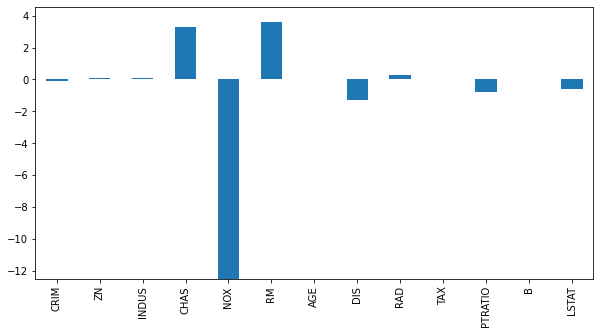

In [ ]:
# 필요한 라이브러리 로딩
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
# 릿지 회귀 모델 적용을 위해 Ridge 로딩
from sklearn.linear_model import Ridge

# 데이터셋 로딩
boston = load_boston()

# 데이터셋 분할
# random_state 값은 강의와 동일하게 지정하세요.
x_train, x_test, y_train, y_test = train_test_split(boston.data,
                                                    boston.target,
                                                    test_size=0.3,
                                                    random_state=12)

# 규제를 위한 alpha 값 초기화
# 학습시에는  alpha 값을 바꾸가면서 테스트해보시고,
# 최종 코드 제출시에는 0.1 로 지정후 제출하세요.
alpha = 0.1

# Rigde 클래스 객체 생성
ridge = Ridge(alpha=alpha)

# 규제 학습 수행
ridge.fit(x_train, y_train)

# 모델을 통한 예측
ridge_pred = ridge.predict(x_test)

# 학습된 모델에 대한 R^2 계산
r2_train = ridge.score(x_train, y_train)
r2_test = ridge.score(x_test, y_test)
print('Training-datasset R2 : {0:.3f}'.format(r2_train))
print('Test-datasset R2 : {0:.3f}'.format(r2_test))

# 컬럼별 회귀계수 저장한 Series 객체 생성 및 출력              
ridge_coef_table = pd.Series(data=np.round(ridge.coef_, 1),
                             index=boston.feature_names)
print('Ridge Regression Coefficients :')
print(ridge_coef_table.sort_values(ascending=False))

# 막대그래프 시각화 
plt.figure(figsize=(10,5))
ridge_coef_table.plot(kind='bar')
plt.ylim(-12.5)
plt.show()

라쏘 회귀 실습

Training-datasset R2 : 0.736
Test-datasset R2 : 0.693
Lasso Regression Coefficients :
RM         3.4
CHAS       1.8
RAD        0.3
ZN         0.1
B          0.0
TAX       -0.0
AGE        0.0
NOX       -0.0
INDUS      0.0
CRIM      -0.1
PTRATIO   -0.6
LSTAT     -0.7
DIS       -1.1
dtype: float64


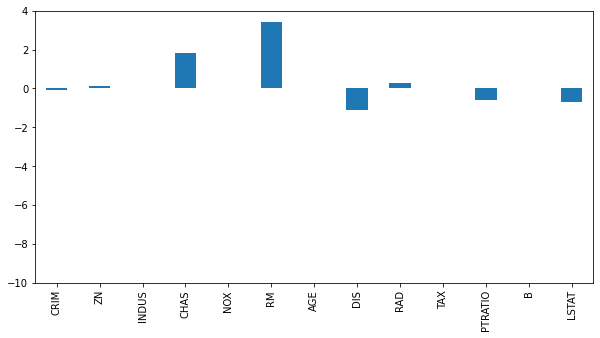

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
# sklearn.linear_model 모듈의 Lasso 클래스 로딩
from sklearn.linear_model import Lasso

# 데이터셋 로딩
boston = load_boston()

# 데이터셋 분할
# test_size=0.3, random_state=12 로 지정하세요.
x_train, x_test, y_train, y_test = train_test_split(boston.data,
                                                    boston.target,
                                                    test_size=0.3,
                                                    random_state=12)

# 규제를 위한 alpha 값 초기화
# 학습시에는 alpha 값을 바꾸가면서 테스트해보시고,
# 최종 코드 제출시에는 0.1 로 지정후 제출하세요.
alpha = 0.1

# Lasso 클래스 객체 생성
lasso = Lasso(alpha=alpha)

# fit() 을 통한 규제 학습 수행
lasso.fit(x_train, y_train)

# predict() 를 통한 학습된 모델 기반 예측
lasso_pred = lasso.predict(x_test)

# score() 를 통해 회귀 모델의 R^2 출력
# 학습된 모델에 대한 R^2 계산
r2_train = lasso.score(x_train, y_train)
r2_test = lasso.score(x_test, y_test)
print('Training-datasset R2 : {0:.3f}'.format(r2_train))
print('Test-datasset R2 : {0:.3f}'.format(r2_test))

# 회귀 계수 저장을 위한 Seriess 객체 생성 및 출력
lasso_coef_table = pd.Series(data=np.round(lasso.coef_, 1),
                        index=boston.feature_names)
print('Lasso Regression Coefficients :')
print(lasso_coef_table.sort_values(ascending=False))

# 막대그래프 시각화 
plt.figure(figsize=(10,5))
lasso_coef_table.plot(kind='bar')
plt.ylim(-10, 4)
plt.show()

사이킷런을 이용한 로지스틱 회귀 실습 (1)

In [ ]:
# 필요한 라이브러리 로딩
import pandas as pd
import numpy as np

# StandardScaler, train_test_split, LogisticRegression 로딩
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# 분류 모델을 위한 성능 지표 함수 로딩
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

# URL 통해서 캐글의 자전거 대여 수요 데이터셋 다운로드
url = 'https://codepresso-online-platform-public.s3.ap-northeast-2.amazonaws.com/learning-resourse/python-machine-learning-20210326/bike-demand.csv'
df_bike = pd.read_csv(url)

# 독립변수 데이터 생성
# temp, atemp, humidity, windspeed	컬럼 데이터만 저장
X_df_bike = df_bike.iloc[:, 5:9]
#print(X_df_bike.head(5))

# 종속변수 데이터를 위한 파생변수 생성
# 총 대여건수(count) 가 500 이상인 경우 1, 미만인 경우 0
df_bike['y'] = 1
df_bike.loc[df_bike['count'] < 500, 'y'] = 0
y = df_bike['y'] 

# StandardScaler 이용한 스케일링
scaler = StandardScaler()
scaler.fit(X_df_bike)
result = scaler.transform(X_df_bike)

# 스케일된 결과 데이터를 DataFrame 으로 저장
X_scaled_bike = pd.DataFrame(data=result,
                             columns=X_df_bike.columns)

# 데이터셋 분리
x_train, x_test, y_train, y_test = train_test_split(X_scaled_bike,
                                                    y,
                                                    test_size=0.3,
                                                    random_state=12)

# LogisticRegression 모델 객체 생성
clf = LogisticRegression()

# 훈련 데이터를 통한 학습
clf.fit(x_train, y_train)

# 학습된 모델에 테스트 데이터셋 이용하여 예측값 생성
y_pred = clf.predict(x_test)

# score 메소드를 통한 정확도 측정
train_score = clf.score(x_train, y_train)
test_score = clf.score(x_test, y_test)
print('Training Data Accuracy: {:0.3f}'.format(train_score))
print('Testing Data Accuracy: {:0.3f}'.format(test_score))

# 오차 행렬 생성
confusion = confusion_matrix(y_test, y_pred)
print('Confusion Matrixs : \n', confusion)

# 정확도, 정밀도, 재현율 계산 
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
  
print('Accuracy: {0:.4f}, Precision: {1:.4f}, Recall: {2:.4f}'
      .format(accuracy , precision ,recall))

Training Data Accuracy: 0.927
Testing Data Accuracy: 0.924
Confusion Matrixs : 
 [[3018    0]
 [ 248    0]]
Accuracy: 0.9241, Precision: 0.0000, Recall: 0.0000


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


사이킷런을 이용한 로지스틱 회귀 실습 (2)

In [ ]:
# 필요한 데이터셋 로딩
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score

# 데이터셋 로딩
cancer = load_breast_cancer()


# StandardScaler() 활용한 데이터 스케일링 
scaler = StandardScaler()
scaler.fit(cancer.data)
data_scaled = scaler.transform(cancer.data)

# 학습데이터와 테스트 데이터로 분할​
x_train, x_test, y_train, y_test = train_test_split(data_scaled, 
                                                    cancer.target, 
                                                    test_size=0.3, 
                                                    random_state=12)

# 로지스틱 회귀 분석 모델 생성 및 학습
clf = LogisticRegression()
clf.fit(x_train, y_train)

# 학습된 모델에 테스트 데이터(x_test) 입력하여 예측값 생성
y_pred = clf.predict(x_test)

# 오차행렬 생성 및 출력
confusion = confusion_matrix(y_test, y_pred)

print('Confusion Matrix')
print(confusion)

# Accuracy, Precision, Recall 확인
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
  
print('Accuracy: {0:.4f},Precision: {1:.4f},Recall: {2:.4f}'
      .format(accuracy , precision ,recall))

Confusion Matrix
[[ 61   3]
 [  0 107]]
Accuracy: 0.9825,Precision: 0.9727,Recall: 1.0000


사이킷런을 활용한 roc커브와 auc 실습

Predicted class probability(1st Data) [0.887 0.113]
Target data index(1st Data) 0
Sample Threshold Index(n=10): [   0  110  220  330  440  550  660  770  880  990 1100]
Sample Threshold Value(n=10):  [1.48 0.18 0.14 0.1  0.08 0.06 0.05 0.04 0.03 0.02 0.02]
Sample Threshold FPR(n=10):  [0.    0.056 0.114 0.192 0.281 0.387 0.487 0.593 0.699 0.802 0.922]
Sample Threshold TPR(n=10):  [0.    0.258 0.48  0.625 0.702 0.786 0.847 0.887 0.944 0.984 0.992]


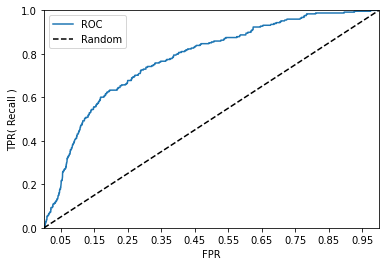

Testing Data AUC: 0.777


In [ ]:
# 필요한 라이브러리 로딩
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# URL 통해서 캐글의 자전거 대여 수요 데이터셋 다운로드
url = 'https://codepresso-online-platform-public.s3.ap-northeast-2.amazonaws.com/learning-resourse/python-machine-learning-20210326/bike-demand.csv'
df_bike = pd.read_csv(url)

# 독립변수 데이터 생성
# temp, atemp, humidity, windspeed	컬럼 데이터만 저장
X_df_bike = df_bike.iloc[:, 5:9]
#print(X_df_bike.head(5))

# 종속변수 데이터를 위한 파생변수 생성
# 총 대여건수(count) 가 500 이상인 경우 1, 미만인 경우 0
df_bike['y'] = 1
df_bike.loc[df_bike['count'] < 500, 'y'] = 0
y = df_bike['y'] 

# StandardScaler 이용한 스케일링
scaler = StandardScaler()
scaler.fit(X_df_bike)
result = scaler.transform(X_df_bike)

# 스케일된 결과 데이터를 DataFrame 으로 저장
X_scaled_bike = pd.DataFrame(data=result, 
                             columns=X_df_bike.columns)

# 데이터셋 분리
x_train, x_test, y_train, y_test = train_test_split(X_scaled_bike, 
                                                    y, 
                                                    test_size=0.3, 
                                                    random_state=12)

# LogisticRegression 모델 객체 생성
clf = LogisticRegression()

# 훈련 데이터를 통한 학습
clf.fit(x_train, y_train)

# roc_curve() 메소드 로딩
from sklearn.metrics import roc_curve

# 학습된 모델에서 클래스 별 확률 예측값 생성
predict_prob = clf.predict_proba(x_test)
print('Predicted class probability(1st Data)', np.round(predict_prob[0], 3))
print('Target data index(1st Data)', y_test.values[0])

# roc_curve 메소드를 통한 FPR, TPR 계산 값과 이를 위한 Threshold 값 생성
fprs , tprs , thresholds = roc_curve(y_test, predict_prob[:, 1])

# FPR, TPR 계산 값 Threshold 값을 10건 만 샘플링
thr_index = np.arange(0, thresholds.shape[0], 110)
print('Sample Threshold Index(n=10):', thr_index)
print('Sample Threshold Value(n=10): ', np.round(thresholds[thr_index], 2))
print('Sample Threshold FPR(n=10): ', np.round(fprs[thr_index], 3))
print('Sample Threshold TPR(n=10): ', np.round(tprs[thr_index], 3))

# ROC Curve를 그리기 위한 함수
def roc_curve_plot(y_test , pred_proba_c1):
    import matplotlib.pyplot as plt
    fprs , tprs , thresholds = roc_curve(y_test ,pred_proba_c1)

    plt.plot(fprs , tprs, label='ROC')
    plt.plot([0, 1], [0, 1], 'k--', label='Random')
    
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    plt.xlim(0,1); plt.ylim(0,1)
    plt.xlabel('FPR'); plt.ylabel('TPR( Recall )')
    plt.legend()
    plt.show()

 # roc_curve_plot 함수를 이용하여 ROC Curve 생성
roc_curve_plot(y_test, clf.predict_proba(x_test)[:, 1])

# roc_auc_score() 메소드 로딩
from sklearn.metrics import roc_auc_score

# roc_auc_score() 메소드를 통한 AUC 측정
roc_score = roc_auc_score(y_test.values, predict_prob[:, 1])
print('Testing Data AUC: {:0.3f}'.format(roc_score))

사이킷런을 활용한 Decision Tree 모델 구현

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()

x_train, x_test, y_train, y_test = train_test_split(cancer.data,
													cancer.target,
													test_size=0.3,
													random_state=12)
# DecisionTreeClassifier 임포트
from sklearn.tree import DecisionTreeClassifier

# DecisionTreeClassifier 객체 생성
dt = DecisionTreeClassifier(random_state=12)

# fit 함수로 Decision Tree 모델 학습
dt.fit(x_train, y_train)

# 학습 된 Tree의 Depth 확인 - get_depth() 함수 사용
print("Depth of tree: ", dt.get_depth())
# 학습 된 Tree의 리프 노드 개수 확인 - get_n_leaves() 함수 사용
print("Number of leaves: ", dt.get_n_leaves())

# predict 함수로 테스트 데이터 세트 예측
y_pred = dt.predict(x_test)
print(y_pred[0:3])

Depth of tree:  6
Number of leaves:  13
[0 1 1]


사이킷런을 활용한 Decision Tree 모델 성능 평가

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
cancer = load_breast_cancer()

x_train, x_test, y_train, y_test = train_test_split(cancer.data,
													cancer.target,
													test_size=0.3,
													random_state=12)

dt = DecisionTreeClassifier(random_state=12)
dt.fit(x_train, y_train)
y_pred = dt.predict(x_test)

# 성능 지표 측정 함수 임포트 - accuracy_score, precision_score, recall_score
from sklearn.metrics import accuracy_score, precision_score, recall_score

# accuracy 계산
accuracy = accuracy_score(y_test, y_pred)
# precision 계산
precision = precision_score(y_test, y_pred)
# recall 계산
recall = recall_score(y_test, y_pred)

# 성능 지표 출력
print("Accuracy: {:.3f}".format(accuracy))
print("Precision: {:.3f}".format(precision))
print("Recall: {:.3f}".format(recall))

Accuracy: 0.912
Precision: 0.911
Recall: 0.953


Decision Tree 모델의 feature 중요도 확인

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
cancer = load_breast_cancer()

x_train, x_test, y_train, y_test = train_test_split(cancer.data,
													cancer.target,
													test_size=0.3,
													random_state=12)

dt = DecisionTreeClassifier(random_state=12)
dt.fit(x_train, y_train)

# 학습 된 모델의 Feature Importance 확인
for i in range(0,len(cancer.feature_names)):
  print('{0}: {1:.3f}'.format(cancer.feature_names[i], dt.feature_importances_[i]))

mean radius: 0.000
mean texture: 0.000
mean perimeter: 0.000
mean area: 0.014
mean smoothness: 0.007
mean compactness: 0.000
mean concavity: 0.000
mean concave points: 0.041
mean symmetry: 0.000
mean fractal dimension: 0.000
radius error: 0.000
texture error: 0.000
perimeter error: 0.000
area error: 0.009
smoothness error: 0.000
compactness error: 0.000
concavity error: 0.000
concave points error: 0.024
symmetry error: 0.000
fractal dimension error: 0.000
worst radius: 0.011
worst texture: 0.024
worst perimeter: 0.777
worst area: 0.011
worst smoothness: 0.011
worst compactness: 0.000
worst concavity: 0.011
worst concave points: 0.061
worst symmetry: 0.000
worst fractal dimension: 0.000


Decision Tree 모델의 Hyperparameter 실습

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
cancer = load_breast_cancer()

x_train, x_test, y_train, y_test = train_test_split(cancer.data,
													cancer.target,
													test_size=0.3,
													random_state=12)

# Hyperparameter 설정 없이 학습
dt = DecisionTreeClassifier(random_state=12)
dt.fit(x_train, y_train)

# max depth와 leaf 노드 개수 확인, get_depth(), get_n_leaves() 함수 사용
print("Max Depth: ", dt.get_depth())
print("Number of leaves: ", dt.get_n_leaves())

# max_depth를 3으로 설정 후 학습
dt = DecisionTreeClassifier(max_depth=3, random_state=12)
dt.fit(x_train, y_train)

# max depth와 leaf 노드 개수 확인, get_depth(), get_n_leaves() 함수 사용
print("Max Depth: ", dt.get_depth())
print("Number of leaves: ", dt.get_n_leaves())

# max_leaf_nodes를 9으로 설정 후 학습
dt = DecisionTreeClassifier(max_leaf_nodes=9, random_state=12)
dt.fit(x_train, y_train)

# max depth와 leaf 노드 개수 확인, get_depth(), get_n_leaves() 함수 사용
print("Max Depth: ", dt.get_depth())
print("Number of leaves: ", dt.get_n_leaves())

Max Depth:  6
Number of leaves:  13
Max Depth:  3
Number of leaves:  8
Max Depth:  4
Number of leaves:  9


사이킷런을 활용한 Voting Classifier 실습


In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

cancer = load_breast_cancer()
x_train, x_test, y_train, y_test = train_test_split(cancer.data,
													cancer.target,
													test_size=0.3,
													random_state=12)

from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

# LogisticRegression 및 DecisionTreeClassifier 객체 생성
lr = LogisticRegression(random_state=12,max_iter=10000)
dt = DecisionTreeClassifier(random_state=12)

# VotingClassifier 객체 생성
voting = VotingClassifier(estimators=[('LR',lr), ('DT',dt)], voting='soft')

# VotingClassifier 학습 및 검증
voting.fit(x_train , y_train)
pred = voting.predict(x_test)

# accuracy_score 호출하여 accuracy 계산 후 출력
print('Accuracy: {0:.3f}'.format(accuracy_score(y_test, pred)))

Accuracy: 0.912


사이킷런을 활용한 Random Forest 모델 실습

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

cancer = load_breast_cancer()
x_train, x_test, y_train, y_test = train_test_split(cancer.data,
													cancer.target,
													test_size=0.3,
													random_state=12)

# RandomForestClassifier 임포트
from sklearn.ensemble import RandomForestClassifier

# RandomForestClassifier 객체 생성
rf = RandomForestClassifier(max_depth=5, random_state=12)

# RandomForestClassifier 객체 학습 및 검증
rf.fit(x_train, y_train)
pred = rf.predict(x_test)

print('Accuracy: {0:.3f}'.format(accuracy_score(y_test, pred)))

Accuracy: 0.924


사이킷런을 활용한 주성분분석(PCA) 실습

iris dataset format and keys
 dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])
iris dataset columns
 ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
   sep_len  sep_wt  pet_len  pet_wt  target
0      5.1     3.5      1.4     0.2       0
1      4.9     3.0      1.4     0.2       0
2      4.7     3.2      1.3     0.2       0
3      4.6     3.1      1.5     0.2       0
4      5.0     3.6      1.4     0.2       0
        sep_len  sep_wt  pet_len  pet_wt
target                                  
0            50      50       50      50
1            50      50       50      50
2            50      50       50      50
    sep_len    sep_wt   pet_len    pet_wt
0 -0.900681  1.019004 -1.340227 -1.315444
1 -1.143017 -0.131979 -1.340227 -1.315444
2 -1.385353  0.328414 -1.397064 -1.315444
3 -1.506521  0.098217 -1.283389 -1.315444
4 -1.021849  1.249201 -1.340227 -1.315444
PCA Shape:
 (2, 4)
PCA eigenvectors:
 [[ 0.52106591 -0.26934

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


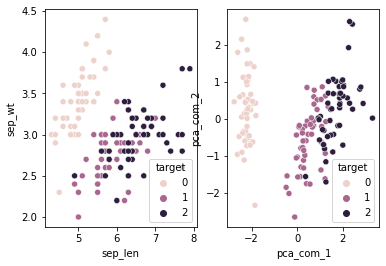

In [ ]:
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#iris 데이터셋 로드와 Dict 포맷의 키 확인하기
data = load_iris()
print("iris dataset format and keys\n",data.keys())

#feature name과 관측값 가져오기
iris_data = data['data']
iris_cols = data['feature_names']
print("iris dataset columns\n",iris_cols)

#column name을 재설정
iris_cols=['sep_len', 'sep_wt', 'pet_len', 'pet_wt']

#데이터프레임 생성
iris_df = pd.DataFrame(data= iris_data, columns= iris_cols)
iris_df['target'] = data['target']
print(iris_df.head(5))

#품종별 데이터 카운팅 체크
target_cnt_df = iris_df.groupby(by='target').count()
print(target_cnt_df)

#PCA 수행
#표준화(스케일링)
from sklearn.preprocessing import StandardScaler

X_train = iris_df.iloc[:, :4]
iris_z_score = StandardScaler().fit_transform(X_train) 

iris_z_df = pd.DataFrame(data= iris_z_score, columns= iris_cols)
print(iris_z_df.head(5))

#주성분 분석(Feature 4 --> 2 axes)
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

pca.fit(iris_z_df) 

#주성분 찾기 : 고유벡터
print('PCA Shape:\n', pca.components_.shape)
print('PCA eigenvectors:\n',pca.components_)

#고유벡터에 데이터를 투영시키는 과정이 transform이다.
X_pca = pca.transform(iris_z_df)
print('PCA Projection result(shape)\n',X_pca.shape)

#각 주성분이 분산을 얼마나 잘 설명하는지를 나타냄
import numpy as np
print('variance :\n',pca.explained_variance_ratio_)
print('total variance :\n', np.sum(pca.explained_variance_ratio_))
print('\n')

#projection 된 결과를 데이터프레임으로 구성
pca_cols = ['pca_com_1', 'pca_com_2']
pca_df = pd.DataFrame(data= X_pca, columns= pca_cols)
pca_df['target'] = data['target']
print(pca_df.head(5))

#주성분 분석 결과 시각화
fig, ax = plt.subplots(ncols=2)

sns.scatterplot(iris_df['sep_len'], iris_df['sep_wt'], 
                hue=iris_df['target'], ax=ax[0])
sns.scatterplot(pca_df['pca_com_1'], pca_df['pca_com_2'], 
                hue=pca_df['target'], ax=ax[1])
plt.show()


사이킷런을 활용한 선형판별분석(LDA) 실습

iris dataset format and keys
 dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])
iris dataset columns
 ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
   sep_len  sep_wt  pet_len  pet_wt
0      5.1     3.5      1.4     0.2
1      4.9     3.0      1.4     0.2
2      4.7     3.2      1.3     0.2
3      4.6     3.1      1.5     0.2
4      5.0     3.6      1.4     0.2
   sep_len  sep_wt  pet_len  pet_wt  label
0      5.1     3.5      1.4     0.2      0
1      4.9     3.0      1.4     0.2      0
2      4.7     3.2      1.3     0.2      0
3      4.6     3.1      1.5     0.2      0
4      5.0     3.6      1.4     0.2      0
       sep_len  sep_wt  pet_len  pet_wt
label                                  
0           50      50       50      50
1           50      50       50      50
2           50      50       50      50
판별식 선형계수
 [[  6.31475846  12.13931718 -16.94642465 -20.77005459]
 [ -1.53119919  -4.37604348   4.69566531  

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


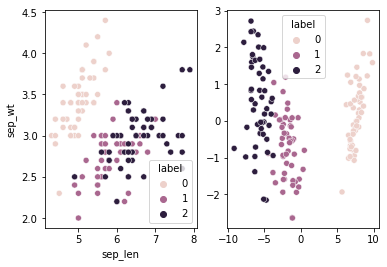

In [ ]:
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#iris 데이터셋 로드와 Dict 포맷의 키 확인하기
data = load_iris()
print("iris dataset format and keys\n",data.keys())

#feature name과 관측값 가져오기
iris_data = data['data']
iris_cols = data['feature_names']
print("iris dataset columns\n",iris_cols)

#column name을 재설정
iris_cols=['sep_len', 'sep_wt', 'pet_len', 'pet_wt']

#데이터프레임 생성하기 ==> 학습시키기 위한 데이터(독립변수들)
iris_df = pd.DataFrame(data= iris_data, columns= iris_cols)
print(iris_df.head(5))

#데이터프레임에 학습 데이터의 정답값(라벨) 데이터 추가(종속변수)
iris_df['label'] = data['target']
print(iris_df.head(5))

#종속변수 각 그룹에 대해 데이터 카운팅 해보기
check_df = iris_df.groupby(by='label').count()
print(check_df)

#LDA 수행
#LDA 패키지 import
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

#학습시키기 위한 독립변수와 종속변수 분할하기
X_train = iris_df[iris_cols]
y_train = iris_df['label']

#LDA 오브젝트생성 및 독립변수와 종속변수를 이용해 LDA 환경구성
lda = LDA().fit(X_train, y_train)
'''
fit은 독립변수와 종속변수를 매달아 두는 것임
학습을 완전히 한 것이 아님
transform을 활용해야 함
'''
print("판별식 선형계수\n", lda.coef_)
print("판별식 상수\n", lda.intercept_)
y_pred = pd.DataFrame(lda.predict(X_train))
print("예측결과\n", y_pred.head(5))
y_pred_score = pd.DataFrame(lda.predict_proba(X_train))
print("예측스코어\n", y_pred_score.head(5))
print("예측정확도\n", lda.score(X_train,y_train))

# 분류 결과 확인하기
from sklearn.metrics import confusion_matrix

conf_df = pd.DataFrame(confusion_matrix(y_train, lda.predict(X_train)))
conf_df.columns=['pred 0', 'pred 1', 'pred 2']#setosa,versicolor,virginica
conf_df.index = ['real 0', 'real 1', 'real 2']
print('Confusion Matrix \n',conf_df)  

#시각화로 확인해보기
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
cld=LinearDiscriminantAnalysis()

X_lda = cld.fit_transform(X_train, y_train)
print(X_lda.shape)

#데이터셋 시각화 해보기
fig, ax = plt.subplots(ncols=2)

sns.scatterplot(iris_df['sep_len'], iris_df['sep_wt'], 
                hue=iris_df['label'], ax=ax[0])
sns.scatterplot(X_lda[:,0], X_lda[:,1], hue=y_train, ax=ax[1])
plt.show()


K-Fold 교차 검증 구현

In [ ]:
# K Fold Validation을 위한 cross_val_score() 메서드 로딩
from sklearn.model_selection import cross_val_score

# 모델 구현을 위한 라이브러리 로딩
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
import numpy as np

# load_iris() 메서드를 이용하여 iris 데이터 셋 로드
iris = load_iris()
data = iris.data
label = iris.target

# DecisionTreeClassifier 모델 객체 생성
dt_clf = DecisionTreeClassifier(random_state=156)

# cross_val_score() 메서드를 이용하여 교차 검증 수행
scores = cross_val_score(estimator=dt_clf,
                        X=data, y=label,
                        scoring='accuracy',
                        cv=3)

# 교차 검증 수행 결과 성능 지표 출력
print('Fold val accuracy:',np.round(scores, 4))
print('Avg val accuracy:', np.round(np.mean(scores), 4))

Fold val accuracy: [0.98 0.94 0.98]
Avg val accuracy: 0.9667


머신러닝 모델의 최적 파라미터 탐색
-GridSearchCV API 모델 활용

In [ ]:
# 하이퍼파라미터 튜닝을 을 위한 GridSearchCV 라이브러리 로딩
from sklearn.model_selection import GridSearchCV

# 모델 구현을 위한 라이브러리 로딩
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

# load_iris() 메서드를 이용하여 iris 데이터 셋 로드
iris = load_iris()

# 학습, 테스트 데이터셋 분리
x_train, x_test, y_train, y_test = train_test_split(iris.data, 
                                                    iris.target, 
                                                    test_size=0.2,
                                                    random_state=121)


# DecisionTreeClassifier 모델 객체 생성
dtree = DecisionTreeClassifier()

# 모델의 후보 파라미터 셋(param_grid)을 지정한 딕셔너리 객체 생성
parameters = {'max_depth':[1,2,3],
              'min_samples_split':[2,3]}

# GridSearchCV 객체 생성
grid_dtree = GridSearchCV(estimator=dtree,
                          param_grid=parameters,
                          cv=3,
                          refit=True)

# GridSearchCV 객체의 fit() 메서드를 이용하여
# 후보 파라미터 셋의 성능 검증
grid_dtree.fit(x_train, y_train)

# 후보 파라미터 셋의 성능 검증 결과 출력
print('Optimal parameter:', grid_dtree.best_params_)
print('Max accuracy: {0:.4f}'.format(grid_dtree.best_score_))

# 최적의 파라미터 모델을 이용하여 예측값 생성
estimator = grid_dtree.best_estimator_
pred = estimator.predict(x_test)

# 최적의 파라미터 모델의 성능지표 출력
print('Test accuracy: {0:.4f}'.format(accuracy_score(y_test,pred))) 

Optimal parameter: {'max_depth': 3, 'min_samples_split': 2}
Max accuracy: 0.9750
Test accuracy: 0.9667
